0.6998558044433594  segundos


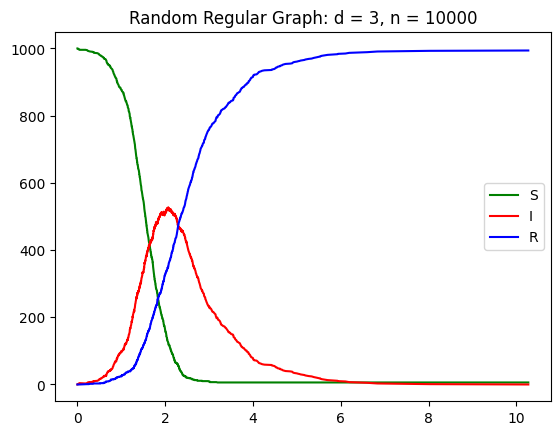

In [361]:
# Medir tempo

import time
a = time.time()

import networkx as nx

#G = nx.Graph()
#G.add_nodes_from((0,1,2,3,4))
#G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,0),(0,2),(0,3),(1,3),(1,4),(2,4)])

# A partir de d = 3 e n=1000 a epidemia se propaga, já se d for 1 ou 2, não ocorre nada.

d = 3
n = 1000
G = nx.random_regular_graph(d,n)

τ = 4
γ = 1

initial_infecteds = [3]

tmax = 100

times = [0]
S = [len(G.nodes)]
I = [0]
R = [0]

Q = []

import numpy as np

for u in G.nodes:
    nx.set_node_attributes(G, {u: "suscetible"}, name='status')
    nx.set_node_attributes(G, {u: np.inf}, name='pred_inf_time')

for u in initial_infecteds:
    event = {'node':u, 'time':0, 'ação':'transmit'}
    nx.set_node_attributes(G, {u: 0}, name='pred_inf_time')
    Q.append(event)


while len(Q) != 0:
    """print('\nIniciando')
    print('Q: ',Q)
    
    for m in G.nodes:
        print(G.nodes[m])"""
        
    Q0 = Q[0]
    for i in range(1,len(Q)):
        if Q[i]['time'] < Q0['time']:
            Q0 = Q[i]
    Q.remove(Q0)

    Event = Q0
    
    if Event['ação'] == 'transmit':
        
        if G.nodes[Event['node']]['status'] == 'suscetible':
            # process trans SIR

            # u = Event['node'] é o indice do node que vai ser infectado
            u = Event['node']
            t = Event['time']
            
            times.append(t)

            S.append(S[-1]-1)
            I.append(I[-1]+1)
            R.append(R[-1])

            G.nodes[u]['status'] = 'infected'
            
            # Tempo de recuperação deste node infectado
            nx.set_node_attributes(G, {u: t + np.random.exponential(1/γ)}, name='rec_time')

            if G.nodes[u]['rec_time'] < tmax:
                newEvent = {'node':u, 'time':G.nodes[u]['rec_time'], 'ação':'recover'}
                Q.append(newEvent)

            for v in list(G.neighbors(u)):

                # find trans SIR

                if G.nodes[v]['status'] == 'suscetible':
                    
                    inf_time = t + np.random.exponential(1/τ)

                    mínimo = min([G.nodes[u]['rec_time'], tmax, G.nodes[v]['pred_inf_time']])

                    if inf_time < mínimo:
                        newEvent = {'node':v, 'time':inf_time, 'ação': 'transmit'}
                        Q.append(newEvent)
                        G.nodes[v]['pred_inf_time'] = inf_time
    
        """print('Ocorreu uma infecção')
        print('S: ',S)
        print('I: ',I)
        print('R: ',R)
        print('Times: ',times)"""
        
    else:
        
        t = G.nodes[Event['node']]['rec_time']
        times.append(t)
        S.append(S[-1])
        I.append(I[-1]-1)
        R.append(R[-1]+1)
        G.nodes[Event['node']]['status'] = 'recovered'

        """print('Ocorreu uma recuperação')
        print('S: ',S)
        print('I: ',I)
        print('R: ',R)
        print('Times: ',times)"""
    

b = time.time()
import matplotlib.pyplot as plt

plt.plot(times,S,color='g',label='S')
plt.plot(times,I,color='r',label='I')
plt.plot(times,R,color='b',label='R')
plt.title('Random Regular Graph: d = 3, n = 10000')
plt.legend()

print(b - a, ' segundos')